## Illustration : Breast Cancer

Dataset Description
1. dataset : Breast Cancer
2. faetures : 30 features extracted from images
3. you can't see the hidden structure in the data easily using data visualization
4. If you see scatter plot, this dataset has 30 features, whichwould result in 30*14 = 420 scatter plots!


Task:
1. Scale the features using Standard Scaler
2. Compute how much information extracted using twocomponents
3. Reduce the dimension from 30 to 2 using two components
4. Plot the first components and the second components
    - x axis first component
    - y axis second component
    - hue : Diagnosis


Result :
1. Information extracted from 2 component 63.24%
2. We reduce the dimension from 30 to 2 and the lost information is 36.76% but you can see that those two features can separate benign and malignant quite well
3. This also means that you can see hidden structure within the data
4. Malignant points are more spread than benign point

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cancer = load_breast_cancer()

In [2]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### Scaler

In [3]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cancer.data)
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [4]:
x_scaled.shape

(569, 30)

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Mengapa perlu scaling:
agar tidak ada var yg terlalu mendominasi. 
<br>
Scaling tidak selalu baik dalam berabgai kondisi seperti data yg sudah sama dari segi skalanya.

### PCA

In [6]:
pca = PCA(n_components=30)
x_pca = pca.fit_transform(x_scaled)

In [34]:
two_pca = pd.DataFrame(x_pca[:,[0,29]])
two_pca

,0,1
0,9.192837,-0.047169
1,2.387802,-0.001868
2,5.733896,0.000751
3,7.122953,-0.019937
4,3.935302,0.021214
...,...,...
564,6.439315,-0.001415
565,3.793382,-0.010419
566,1.256179,0.003770
567,10.374794,-0.023783


In [33]:
x_pca

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [8]:
variance = []
for i in range(0,30):
    variance.append(np.var(x_pca[:,i]))

In [9]:
variance

[13.281607682257887,
 5.69135461320992,
 2.8179489772294173,
 1.9806404746410498,
 1.648730547703881,
 1.2073566119650025,
 0.6752201138947529,
 0.47661714000639815,
 0.41689481236773346,
 0.3506934568239445,
 0.2939156962794056,
 0.26116137022136526,
 0.24135749615901975,
 0.15700972364779062,
 0.09413496502882197,
 0.07986280095456948,
 0.05939903775972818,
 0.052618783506790855,
 0.04947759177675494,
 0.031159402450161106,
 0.029972893911007503,
 0.027439402531630387,
 0.024340837766973204,
 0.018055007000150138,
 0.01548127137495561,
 0.008177639864325006,
 0.0069004638751789405,
 0.0015893378711428284,
 0.0007488030974062966,
 0.00013304482282100618]

In [10]:
variance[:2]

[13.281607682257887, 5.69135461320992]

In [11]:
np.sum(variance)

29.999999999999986

In [12]:
100*np.sum(variance[:2])/np.sum(variance)

63.24320765155938

In [41]:
def model_test ():
    max_score = 0
    x=0
    score=0
    variance = []
    for i in range(30):
        variance.append(np.var(x_pca[:,i]))
    for i in range(0,29):
        for j in range (i+1,30):
            score=100*np.sum(variance[i:j])/np.sum(variance)
            if max_score < score:
                max_score=score
                print(i,j,score, max_score)
            else:
                print(i,j,score, max_score)

In [42]:
model_test()

0 1 44.27202560752631 44.27202560752631
0 2 63.24320765155938 63.24320765155938
0 3 72.63637090899077 72.63637090899077
0 4 79.23850582446094 79.23850582446094
0 5 84.73427431680722 84.73427431680722
0 6 88.75879635669057 88.75879635669057
0 7 91.00953006967308 91.00953006967308
0 8 92.5982538696944 92.5982538696944
0 9 93.9879032442535 93.9879032442535
0 10 95.15688143366665 95.15688143366665
0 11 96.13660042126467 96.13660042126467
0 12 97.00713832200258 97.00713832200258
0 13 97.81166330919929 97.81166330919929
0 14 98.33502905469192 98.33502905469192
0 15 98.64881227145466 98.64881227145466
0 16 98.91502160796992 98.91502160796992
0 17 99.11301840050234 99.11301840050234
0 18 99.28841434552498 99.28841434552498
0 19 99.4533396514475 99.4533396514475
0 20 99.55720432628137 99.55720432628137
0 21 99.65711397265139 99.65711397265139
0 22 99.74857864775683 99.74857864775683
0 23 99.82971477364674 99.82971477364674
0 24 99.8898981303139 99.8898981303139
0 25 99.94150236823042 99.9415023

20 25 0.3842980419490563 99.99955651725726
20 26 0.4115568414968063 99.99955651725726
20 27 0.4345583877474028 99.99955651725726
20 28 0.43985618065121224 99.99955651725726
20 29 0.4423521909758999 99.99955651725726
21 22 0.09146467510543467 99.99955651725726
21 23 0.1726008009953454 99.99955651725726
21 24 0.23278415766251256 99.99955651725726
21 25 0.2843883955790313 99.99955651725726
21 26 0.31164719512678135 99.99955651725726
21 27 0.33464874137737777 99.99955651725726
21 28 0.3399465342811872 99.99955651725726
21 29 0.34244254460587487 99.99955651725726
22 23 0.08113612588991072 99.99955651725726
22 24 0.14131948255707788 99.99955651725726
22 25 0.1929237204735966 99.99955651725726
22 26 0.2201825200213466 99.99955651725726
22 27 0.24318406627194308 99.99955651725726
22 28 0.24848185917575255 99.99955651725726
22 29 0.2509778695004402 99.99955651725726
23 24 0.060183356667167155 99.99955651725726
23 25 0.11178759458368587 99.99955651725726
23 26 0.1390463941314359 99.9995565172572

### Analyze

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'second component')

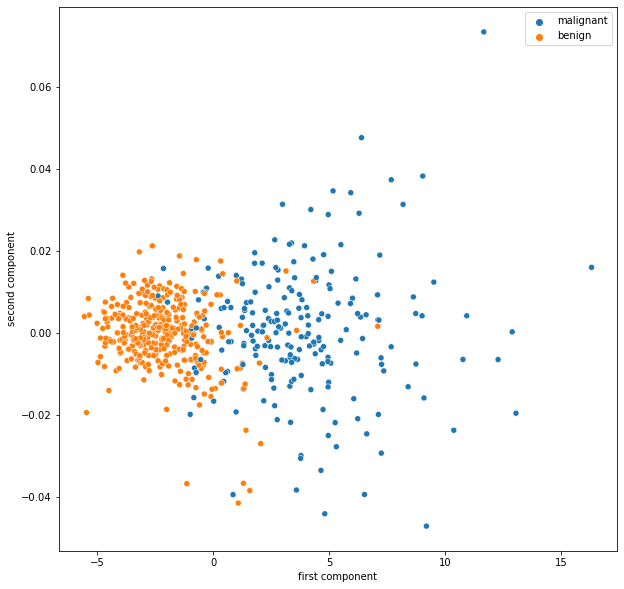

In [37]:
plt.figure(figsize=(10,10))

sns.scatterplot(two_pca[0],two_pca[1],hue=np.where(cancer.target,'benign','malignant'))
plt.xlabel('first component')
plt.ylabel('second component')

1. kedua komponen mewalkili 99.9% dari fitur yang ada
2. kedua komponen dapat memisahkan benign dan malignant dengan baik
3. ada struktur tersembunyi yang dapat diperoleh
4. malignant lebih bervariasi karekteristiknya